

# Naive Bayes Classifier (SPAM E-mail Database)

## Defining the Question

### a) Specifying the Question


Task is to build a model  that will predict if the email is a spam or not spam

### b) Defining the Metric for Success

This project will be success if we will be able draw insights from the given datasets, also we will be able to answer the question required and create a workable model.

### c) Understanding the context

 Creators of this dataset were: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304

 They state that:
Collection of spam e-mails came from our postmaster and individuals who had filed spam. Collection of non-spam e-mails came from filed work and personal e-mails, and hence
the word 'george' and the area code '650' are indicators of 
non-spam.  These are useful when constructing a personalized 
spam filter.  One would either have to blind such non-spam 
indicators or get a very wide collection of non-spam to 
generate a general purpose spam filter.

Source of the data is [link text](https://archive.ics.uci.edu/ml/datasets/Spambase)


### d) Recording the Experimental Design

The project was undertaken using the following design Datasets(real estate dataset)

Load dataset

Data Cleaning

Performing Exploratory Analysis

Feature Engineering

Algorithm to be used:
 - Naive Bayes Classifier 


Challenging the solution

Conclusion

### e) Data Relevance

The relavance of our data will be answered by the following questions.

Did we get correct insights?

How accurate is the data at predicting the price?

Was the dataset sufficient?

## Reading the Data

In [146]:
# Import libraries
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV,RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings(action = 'ignore')


In [147]:
# Load train dataset
# 
spam=pd.read_csv('/content/drive/MyDrive/Moringa/Core_Week_9/spambase/spambase.data')
spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [148]:
# data information
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

## Checking the Data

In [149]:
# Determining the no. of records in our dataset in dataset
#
# Dataset has 891 rows and 12 columns 

spam.shape

(4600, 58)

In [150]:
# Previewing the top details of real estate of our dataset
#
spam.head()


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [151]:
# Previewing the last details of real estate of our dataset
#
spam.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [152]:
# Checking whether each column has an appropriate datatype
#
spam.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

In [153]:
# check columns name
spam.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

## Tidying the Dataset

In [154]:
# checking for duplicates
spam.duplicated().sum()

391

In [155]:
# output duplicates
duplicates=spam[spam.duplicated()]
duplicates

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
25,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.44,0.0,0.0,0.0,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
102,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.64,0.0,0.00,2.59,0.0,0.00,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
103,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
104,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.64,0.0,0.00,2.59,0.0,0.00,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
105,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.49,0.0,0.49,2.71,0.0,1.23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,0.0,0.0,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4440,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.49,0.0,0.49,2.71,0.0,1.23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,0.0,0.0,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4536,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4540,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,8.33,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


We will drop them

In [156]:
# drop duplicates
spam.drop_duplicates(keep='first', inplace=True)
spam.duplicated().sum()

0

In [157]:
# Identify if there Missing Data
#
spam.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

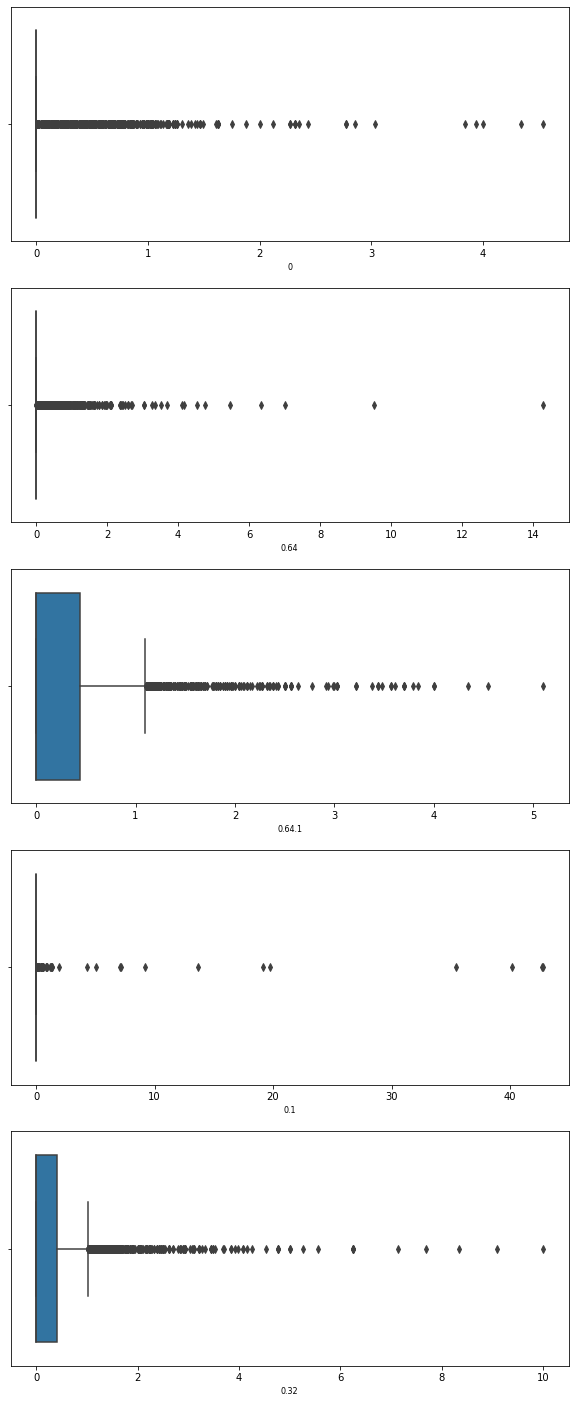

In [158]:
# Checking for outliers.
columns = ['0','0.64','0.64.1','0.1','0.32']
fig, ax = plt.subplots(len(columns), figsize= (10,25))
for i, col_val in enumerate(columns):
  sns.boxplot(x = spam[col_val], ax= ax[i])
  #ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [159]:
spam

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## Exploratory Analysis

In [172]:
spam.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,0.056700,0.565187,0.097679,0.061226,0.044813,0.253813,0.149190,0.188494,1.718318,0.084982,0.810005,0.131618,0.100646,0.090991,0.574132,0.279397,0.369926,0.128605,0.098406,0.103804,0.063559,0.044928,0.102357,0.045788,0.107907,0.099392,0.143516,0.014193,0.084077,0.061292,0.041442,0.141575,0.048784,0.085286,0.320200,0.189420,0.005788,0.034754,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,0.184186,0.882617,0.309342,0.346106,0.242214,0.797629,0.457718,0.540931,1.768967,0.505641,1.149486,1.071384,0.351375,0.431772,1.676715,0.905650,1.775532,0.535489,0.576863,0.439618,0.387312,0.300783,0.569211,0.301847,0.530323,0.386513,0.424553,0.230539,0.448043,0.319556,0.318214,0.793895,0.231898,0.646171,1.046027,0.928413,0.079180,0.298556,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.830000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,2.720000,0.000000,1.280000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [176]:
spam.corr()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,0.063007,0.075919,0.061960,0.032249,0.022439,0.065451,0.081447,0.051765,0.120575,0.020910,0.121471,-0.025585,0.126457,0.205676,-0.075085,-0.063494,-0.048104,-0.050075,-0.041556,-0.054262,-0.038913,-0.031647,-0.042731,-0.026335,-0.046101,-0.057318,-0.058801,-0.008632,-0.011215,-0.035484,-0.005291,-0.026562,-0.025621,-0.022991,-0.037874,-0.034472,-0.000956,-0.018914,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
0.64,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,0.060819,0.026228,0.015628,0.012465,0.061887,0.046615,0.022112,0.178408,0.055852,-0.006690,0.117780,0.001249,0.007145,0.061350,-0.053488,-0.044550,-0.011172,-0.032939,-0.026005,-0.029359,-0.015895,0.028897,-0.032530,0.026085,-0.025472,-0.028196,0.003843,-0.012693,-0.016159,0.002379,-0.019317,-0.035865,0.037745,-0.029024,0.020116,-0.025952,-0.012319,-0.020919,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
0.64.1,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,0.055700,0.065723,0.036484,0.004928,0.104609,0.061927,0.029889,0.110528,0.126490,0.030903,0.147883,-0.039446,0.106747,0.031186,-0.092635,-0.066418,-0.081269,-0.051435,-0.057823,-0.030483,-0.036585,-0.063558,-0.057977,-0.063396,-0.048938,-0.047555,-0.074279,0.031767,-0.017389,-0.045985,-0.030803,-0.007592,-0.052705,-0.056865,-0.056554,-0.060529,0.027397,-0.029448,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
0.1,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,-0.013195,-0.018576,-0.013156,0.003377,0.005373,0.005799,-0.002831,0.016592,-0.009932,-0.005008,0.004578,0.030587,0.014712,0.025849,-0.015706,-0.014033,-0.009712,-0.010632,-0.007933,-0.010914,-0.007656,-0.006969,-0.008248,-0.006977,-0.005909,-0.006312,-0.007440,-0.002724,-0.004508,-0.007656,-0.006076,-0.008320,-0.009387,-0.006115,-0.013182,-0.009434,-0.003410,-0.001862,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
0.32,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,0.079165,0.055008,0.020656,0.001586,0.048309,0.079199,0.137869,0.050814,0.083092,0.027838,0.142992,-0.022716,0.062136,0.000320,-0.076785,-0.079809,-0.062483,-0.064151,0.039627,-0.053614,-0.042054,-0.024256,-0.034750,-0.024556,-0.051059,-0.052211,-0.077684,0.133057,-0.045513,-0.017580,-0.052325,0.107706,-0.054583,0.002770,-0.049499,-0.083315,-0.028146,-0.035040,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
0.2,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,0.056568,0.001589,0.067254,0.007918,0.139996,0.016688,0.057658,0.059395,0.083323,0.057489,0.105705,0.006859,0.181734,0.059413,-0.086713,-0.089548,-0.050829,-0.067792,-0.048913,-0.048282,-0.046362,-0.036538,-0.035047,-0.037102,-0.055412,-0.054320,-0.060639,-0.018425,-0.049239,-0.027739,-0.030909,-0.056557,-0.037628,-0.030185,-0.057496,-0.034381,-0.014747,-0.033488,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
0.3,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,0.186777,-0.008432,0.003143,-0.023831,0.037425,0.135882,0.189635,0.115648,0.102598,0.049664,0.143781,-0.002944,0.068424,0.034532,-0.095021,-0.084690,-0.060474,-0.070284,-0.050273,-0.061318,-0.047909,-0.042713,-0.043030,-0.043152,-0.055224,-0.057370,-0.055945,-0.015450,-0.049438,-0.019723,-0

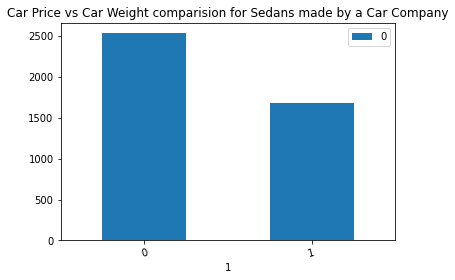

In [185]:
# bar chart
df = spam.groupby(['1']).count().reset_index()
df
import matplotlib.pyplot as plt
     

df_spam = pd.DataFrame(data=df['0'], index=df['1']);

 

# Draw a vertical bar chart

df_spam.plot.bar(rot=15, title="Spam Email Vs Non Spam Email");

plt.show(block=True);

Most of the emails we not spam from the bar chart above

In [160]:
# Reduction using LDA

X=spam.iloc[:,0:57]
y=spam.iloc[:,57]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

## Implementing the Solution

### Modelling

#### Naive Bayes Classifier

##### Gaussian Naive Bayes Classifier

**Model 1 splits to 80 - 20**

In [161]:
# define x and y
X=spam.iloc[:,0:57]
y=spam.iloc[:,57]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('The accuracy score is:',accuracy_score(y_test, y_pred))

[[350 145]
 [ 11 336]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       495
           1       0.70      0.97      0.81       347

    accuracy                           0.81       842
   macro avg       0.83      0.84      0.81       842
weighted avg       0.86      0.81      0.82       842

The accuracy score is: 0.8147268408551069


The accuracy of the model is 81.5%.

Lets find out if by splitting to 70- 30 will improve the model.

**Model 2 splits 70 - 30**

In [162]:
# define x and y
X=spam.iloc[:,0:57]
y=spam.iloc[:,57]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('The accuracy score is:',accuracy_score(y_test, y_pred))

[[536 201]
 [ 20 506]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       737
           1       0.72      0.96      0.82       526

    accuracy                           0.83      1263
   macro avg       0.84      0.84      0.82      1263
weighted avg       0.86      0.83      0.83      1263

The accuracy score is: 0.8250197941409343


**Model 3 splits to 60 - 40**

In [163]:
# define x and y
X=spam.iloc[:,0:57]
y=spam.iloc[:,57]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=0)

# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('The accuracy score is:',accuracy_score(y_test, y_pred))

[[735 259]
 [ 27 663]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       994
           1       0.72      0.96      0.82       690

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.86      0.83      0.83      1684

The accuracy score is: 0.830166270783848


From the above models we will pick the last model(model 3) because it as the highest accuracy of 83.0% with a split of 60-40. so we will pick model 3

##### Multinomial Naive Bayes Classifier

**Model 2 splits to 80 - 20**

In [164]:
# define x and y
X=spam.iloc[:,0:57]
y=spam.iloc[:,57]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

# Training our model
# 
mclf = MultinomialNB()  
model = mclf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('The accuracy score is:',accuracy_score(y_test, y_pred))

[[423  72]
 [103 244]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       495
           1       0.77      0.70      0.74       347

    accuracy                           0.79       842
   macro avg       0.79      0.78      0.78       842
weighted avg       0.79      0.79      0.79       842

The accuracy score is: 0.7921615201900237


**Model 2 splits to 70 - 30**

In [165]:
# define x and y
X=spam.iloc[:,0:57]
y=spam.iloc[:,57]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

# Training our model
# 
mclf = MultinomialNB()  
model = mclf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('The accuracy score is:',accuracy_score(y_test, y_pred))

[[634 103]
 [171 355]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       737
           1       0.78      0.67      0.72       526

    accuracy                           0.78      1263
   macro avg       0.78      0.77      0.77      1263
weighted avg       0.78      0.78      0.78      1263

The accuracy score is: 0.7830562153602534


**Model 3 splits to 60 - 40**

In [166]:
# define x and y
X=spam.iloc[:,0:57]
y=spam.iloc[:,57]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=0)

# Training our model
# 
mclf = MultinomialNB()  
model = mclf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('The accuracy score is:',accuracy_score(y_test, y_pred))

[[843 151]
 [235 455]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       994
           1       0.75      0.66      0.70       690

    accuracy                           0.77      1684
   macro avg       0.77      0.75      0.76      1684
weighted avg       0.77      0.77      0.77      1684

The accuracy score is: 0.7707838479809976


From the above models we will pick the first model because it as the highest accuracy of 79.2% with a split of 80-20. so we will pick model 1

Base on the above models we select Gaussian model 3 because it accuracy of 83.0% is higher than that of Multinormial of 80.9%. So will hyperparameter tune Gaussian model 3

**Hyperparameter Tuning**

In [167]:
np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}


gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=10,
                     verbose=1, 
                     scoring='accuracy')

# Data_transformed = PowerTransformer().fit_transform(X,y)

gs_NB.fit(X,y);
gs_NB.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.5s finished


{'var_smoothing': 8.111308307896872e-07}

In [169]:
# define x and y
X=spam.iloc[:,0:57]
y=spam.iloc[:,57]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=0)

# Training our model
# 
clf = GaussianNB(var_smoothing=8.111308307896872e-07)  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('The accuracy score is:',accuracy_score(y_test, y_pred))

[[896  98]
 [ 89 601]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       994
           1       0.86      0.87      0.87       690

    accuracy                           0.89      1684
   macro avg       0.88      0.89      0.89      1684
weighted avg       0.89      0.89      0.89      1684

The accuracy score is: 0.8889548693586699


After applying parameter tuning, model improve to 88.9%

### Challenging the Question

In [171]:
# Reviewing the Solution 
#
# compare algorithms
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings(action = 'ignore')


# define x and y
X=spam.iloc[:,0:57]
y=spam.iloc[:,57]

# Splitting the data into training and test sets,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.928317 (0.015480)
LDA: 0.889118 (0.015673)
KNN: 0.774261 (0.023950)
CART: 0.904163 (0.009618)
RF: 0.944162 (0.008560)
GBC: 0.945353 (0.006766)
NB: 0.840003 (0.023403)
SVM: 0.801197 (0.022279)


From the above results Gradient Boosting Classifier is better than the other models so to get the best result with the same data Gradient Boosting does well with the acuracy of 94.5%

## Follow up questions

a). Did we have the right data?


We had the right data since we were able to get some insights from it. it also helps in doing a predictive model of deferent algorithms models which gave accuracy

b). Do we need other data to answer our question?

No the data was good may be for the sake of improving accuracy another data may be needed.

c). Did we have the right question?

Yes, Questions were correct since we were able to answer them.

## Conclusion

Gaussian model of split 60-40 has the highest accuracy of 88.9% 

Base on the same data Gradient Boosting algorithm does well with an accuracy of 94.5%